# <font color=orange>**Evrisimsel Sinir Aglari ile Nesne Tespiti**</font> <font color=gray>**(CNN)**</font>

## <font color=orange>**YOLO ile Nesne Tespiti**</font> <font color=gray>**-**</font>

In [2]:
import cv2
import numpy as np
import time
from yolo_model import YOLO
import matplotlib.pyplot as plt

In [3]:
yolo = YOLO(0.6,0.5)

file = 'data/coco_classes.txt'

with open(file) as f:
    class_name = f.readlines()

In [4]:
all_classes = [c.strip() for c in class_name]
all_classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

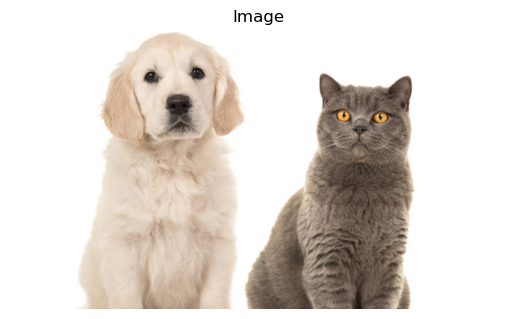

In [57]:
# kedi kopek tespiti

f = 'dog_cat.jpg'
path = 'images/'+f
image = cv2.imread(path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Image');

In [58]:
# Resmi yolo icin uygun hale getirmek gereklidir.

pimage = cv2.resize(image, (416,416))
pimage = np.array(pimage, dtype = 'float32')
pimage /=255.0
pimage = np.expand_dims(pimage, axis = 0)

In [59]:
#YOLO 

boxes, classes, scores = yolo.predict(pimage,image.shape)

1/1 [==============================] - 1s 1s/step


In [60]:
boxes

array([[260.29616654,  41.1714192 , 540.11216569, 880.82198489],
       [782.28799295, 140.79580593, 582.33294046, 781.46666098]])

In [61]:
classes

array([16, 15], dtype=int64)

In [62]:
'''
all_classes listesindeki indexlere gore geldi.
'''

'\nall_classes listesindeki indexlere gore geldi.\n'

In [63]:
scores

array([0.9974857, 0.9959808], dtype=float32)

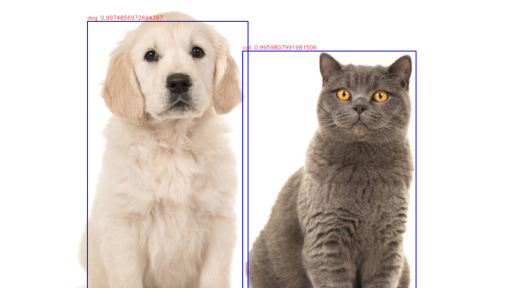

In [64]:
# Gorsellestirme: 

for box, scores, cl in zip(boxes, scores, classes):
    x,y,w,h = box
    
    top = max(0,np.floor(x + 0.5).astype(int))
    left = max(0,np.floor(y + 0.5).astype(int))
    right = max(0,np.floor(x + w + 0.5).astype(int))
    bottom = max(0,np.floor(x + h + 0.5).astype(int))
    
    cv2.rectangle(image, (top,left), (right,bottom),(255,0,0),2)
    cv2.putText(image, '{} {}'.format(all_classes[cl],scores),
    (top,left-6), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 1, cv2.LINE_AA)
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)),plt.axis('off');

In [7]:
# Odev

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    time.sleep(0.1)
    
    success, frame = cap.read()
    
    if success:
        pimage = cv2.resize(frame, (416,416))
        pimage = np.array(pimage, dtype = 'float32')
        pimage /=255.0
        pimage = np.expand_dims(pimage, axis = 0)
        
        try:
            
            boxes, classes, scores = yolo.predict(pimage,frame.shape)

            for box, scores, cl in zip(boxes, scores, classes):
                x,y,w,h = box

                top = max(0,np.floor(x + 0.5).astype(int))
                left = max(0,np.floor(y + 0.5).astype(int))
                right = max(0,np.floor(x + w + 0.5).astype(int))
                bottom = max(0,np.floor(x + h + 0.5).astype(int))

                cv2.rectangle(frame, (top,left), (right,bottom),(255,0,0),2)
                cv2.putText(frame, '{} {}'.format(all_classes[cl],scores),
                (top,left-6), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 1, cv2.LINE_AA)

                cv2.imshow('Test',frame)
        except:
            pass
        
        if cv2.waitKey(1) & 0xFF == ord('q'): break
        
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 392ms/step
